<a href="https://colab.research.google.com/github/GuangShuaiWang/Colabnotebook/blob/main/3_way_make_keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 构建神经网络的多种方式，sequential，功能化，subclass等
这部分内容只是涉及了怎样去构建模型。

## Sequential model

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.Dense(20,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="softmax"))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


## functional API
通过这种方式可以创建更加复杂的模型，允许添加更多的输出和输出。这部分内容tensorfolw中也有相关的[介绍](https://www.tensorflow.org/guide/keras/functional)

In [4]:
import tensorflow as tf

In [8]:
inputA = tf.keras.Input(shape = (32,))
inputB = tf.keras.Input(shape = (128,))

x = tf.keras.layers.Dense(8,activation="relu")(inputA)
x = tf.keras.layers.Dense(4,activation="relu")(x)
x = tf.keras.Model(inputs= inputA,outputs = x)

y = tf.keras.layers.Dense(64,activation = "relu")(inputB)
y = tf.keras.layers.Dense(32,activation = "relu")(y)
y = tf.keras.layers.Dense(4,activation = "relu")(y)
y = tf.keras.Model(inputs = inputB, outputs = y)

combine = tf.keras.layers.concatenate([x.output,y.output])
z = tf.keras.layers.Dense(2,activation = "relu")(combine)
z = tf.keras.layers.Dense(1,activation = "softmax")(z)

model = tf.keras.Model(inputs = [inputA,inputB],outputs = z)

In [10]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 64)           8256        ['input_9[0][0]']                
                                                                                                  
 dense_17 (Dense)               (None, 8)            264         ['input_8[0][0]']                
                                                                                            

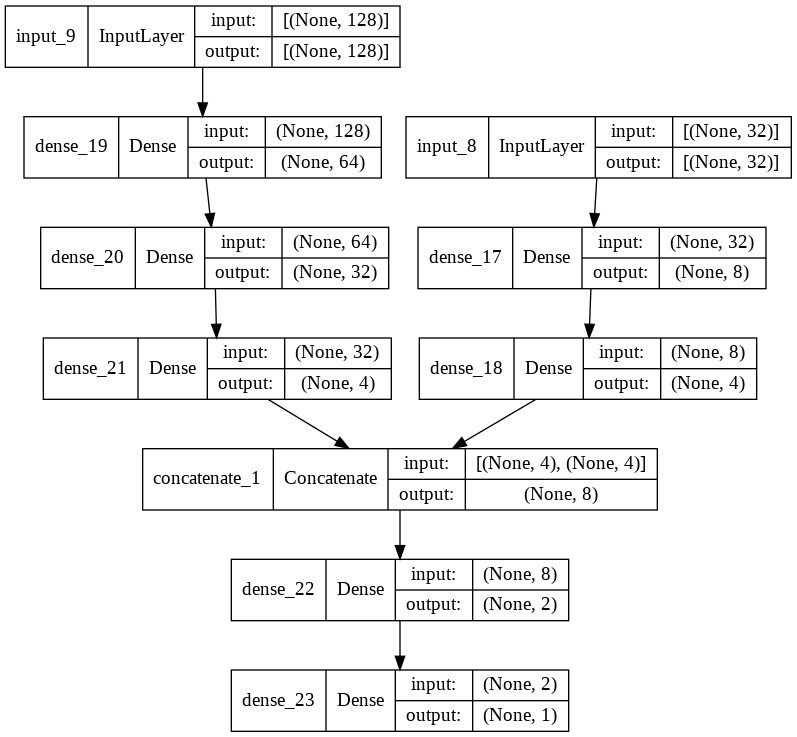

In [12]:
#这里是绘制出模型的框架，非常的好用
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

## modelmodel subclass
通过子类的方式来构建模型，不过这里需要比较多的了解才能使用。

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

In [15]:
#这里是tensorflow中的Autoencoder相关的介绍使用的方法
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(100, activation='relu'),
      layers.Dense(40, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(40, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(200),
      layers.Reshape((40, 5))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [16]:
model = Autoencoder(20)